# Haytor Access Land Example

In [74]:
import shapely.affinity
from shapely.geometry import Point,mapping, LineString, Polygon
import numpy as np
import rasterio
from rasterio import plot, mask
from rtree import index
import networkx as nx
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from cartopy import crs
import xml.etree.ElementTree as ET
import gpxpy.gpx
from pyproj import CRS
from pyproj import Transformer

In [75]:
study_area_shapely = Polygon([(275000,77000),(276000,77000),(276000,78000),(275000,78000)])
#study_area_shp = gpd.read_file(os.path.join('Study_area','study_area.shp'))
Haytor_map = rasterio.open(
        os.path.join('OS Explorer Maps', 'Download_SX77-Haytor_2033809', 'raster-25k_4596071', 'sx', 'sx77.tif'))
elevation = rasterio.open(os.path.join('OS Elevation','Download_Haytor_Elevation_2035988','terrain-5-dtm_4600215','sx','SX77NE.asc'))

## Creating Background map with elevation

C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.


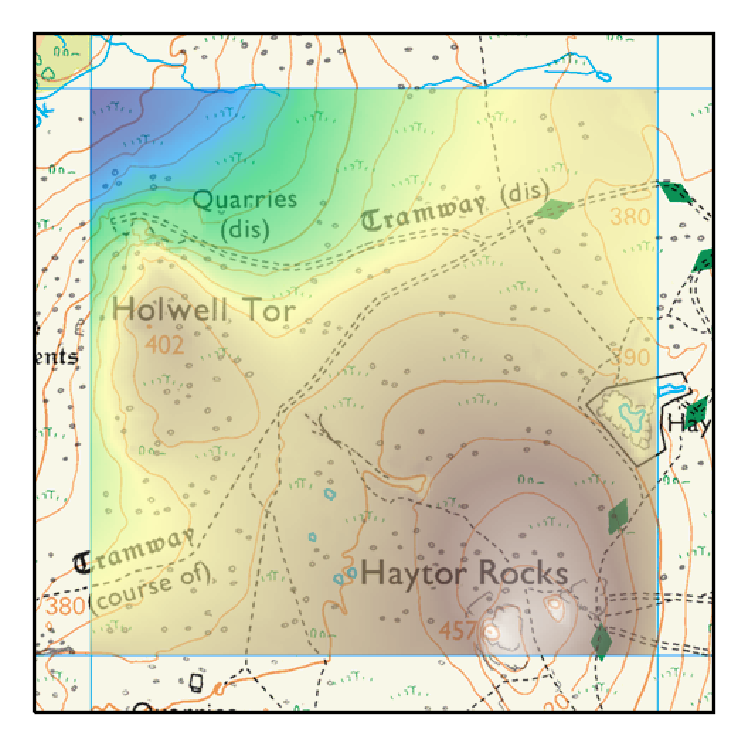

In [76]:
# creating background map
back_array = Haytor_map.read(1)
palette = np.array([value for key, value in Haytor_map.colormap(1).items()])
background_image = palette[back_array]
bounds = Haytor_map.bounds
extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=crs.OSGB())

# display background map
ax.imshow(background_image, origin='upper', extent=extent, zorder=0)

# display elevation
study_area = mapping(study_area_shapely)
elevation_mask, transform_index = mask.mask(elevation,[study_area], filled=False, crop=False)
rasterio.plot.show(elevation_mask, alpha=0.6, transform=transform_index, ax=ax, zorder=1,
                           cmap='terrain')
#set the extent to the study area
#study_area_gpd.plot(ax=ax,zorder = 2)
display_extent = ((study_area_shapely.bounds[0]- 100, study_area_shapely.bounds[2]+ 100,
                       study_area_shapely.bounds[1]- 100, study_area_shapely.bounds[3]+ 100))

ax.set_extent(display_extent, crs=crs.OSGB())
plt.show()
# display elevation
# study_area = mapping(study_area_shapely)
# elevation_mask, transform_index = mask.mask(elevation,[study_area_geojson], filled=False, crop=False)
# rasterio.plot.show(elevation_mask, alpha=0.6, transform=transform_index, ax=ax, zorder=1,
#                    cmap='terrain')

Creating the network

Creating the points

In [77]:
count_x =  np.arange(study_area_shapely.bounds[0], study_area_shapely.bounds[2] +25, 25, dtype=int)
count_y =  np.arange(study_area_shapely.bounds[1], study_area_shapely.bounds[3] +25, 25, dtype=int)

In [78]:
points = []
for i in count_x:
    for j in count_y:
        points.append(Point(i,j))
nodes_gpd = gpd.GeoSeries(points)

In [79]:
#removing duplicates
G = nodes_gpd.geometry.apply(lambda geom: geom.wkb)
nodes_gpd =nodes_gpd.loc[G.drop_duplicates().index]

In [80]:
network_nodes = gpd.GeoDataFrame(geometry=nodes_gpd)
network_nodes['fid'] = range(1,len(network_nodes)+1)
network_nodes

,geometry,fid
0,POINT (275000.000 77000.000),1
1,POINT (275000.000 77025.000),2
2,POINT (275000.000 77050.000),3
3,POINT (275000.000 77075.000),4
4,POINT (275000.000 77100.000),5
...,...,...
1676,POINT (276000.000 77900.000),1677
1677,POINT (276000.000 77925.000),1678
1678,POINT (276000.000 77950.000),1679
1679,POINT (276000.000 77975.000),1680


C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:20: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.


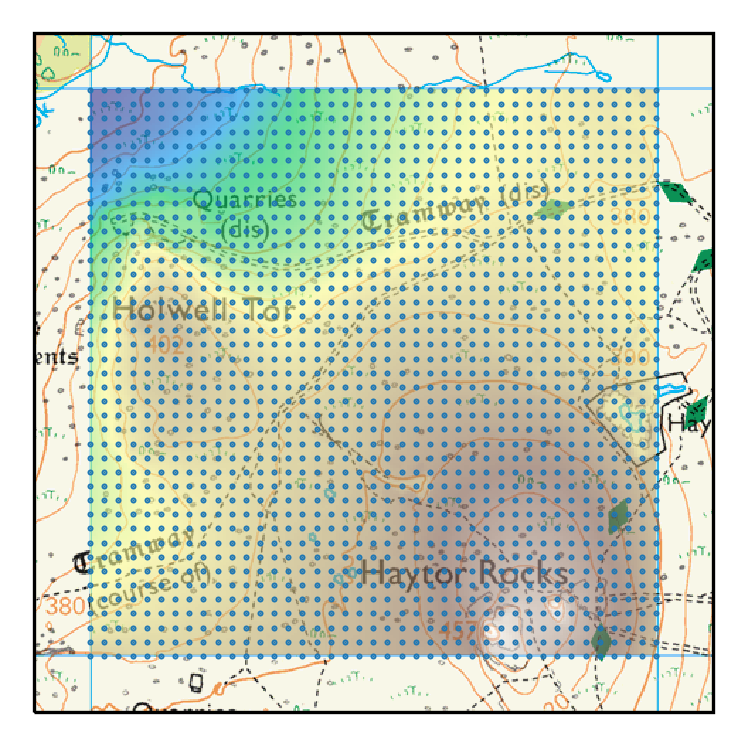

In [81]:
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=crs.OSGB())

# display background map
ax.imshow(background_image, origin='upper', extent=extent, zorder=0)

# display elevation
study_area = mapping(study_area_shapely)
elevation_mask, transform_index = mask.mask(elevation,[study_area], filled=False, crop=False)
rasterio.plot.show(elevation_mask, alpha=0.6, transform=transform_index, ax=ax, zorder=1,
                           cmap='terrain')

# displaying nodes
network_nodes.plot(ax=ax,zorder = 2,markersize=0.2)
#set the extent to the study area
#study_area_gpd.plot(ax=ax,zorder = 2)
display_extent = ((study_area_shapely.bounds[0]- 100, study_area_shapely.bounds[2]+ 100,
                       study_area_shapely.bounds[1]- 100, study_area_shapely.bounds[3]+ 100))

ax.set_extent(display_extent, crs=crs.OSGB())
plt.show()

Finished row 1
Finished row 2
Finished row 3
Finished row 4
Finished row 5
Finished row 6
Finished row 7
Finished row 8
Finished row 9
Finished row 10
Finished row 11
Finished row 12
Finished row 13
Finished row 14
Finished row 15
Finished row 16
Finished row 17
Finished row 18
Finished row 19
Finished row 20
Finished row 21
Finished row 22
Finished row 23
Finished row 24
Finished row 25
Finished row 26
Finished row 27
Finished row 28
Finished row 29
Finished row 30
Finished row 31
Finished row 32
Finished row 33
Finished row 34
Finished row 35
Finished row 36
Finished row 37
Finished row 38
Finished row 39
Finished row 40
Finished row 41
Finished row 42
Finished row 43
Finished row 44
Finished row 45
Finished row 46
Finished row 47
Finished row 48
Finished row 49
Finished row 50
Finished row 51
Finished row 52
Finished row 53
Finished row 54
Finished row 55
Finished row 56
Finished row 57
Finished row 58
Finished row 59
Finished row 60
Finished row 61
Finished row 62
Finished row 63
F

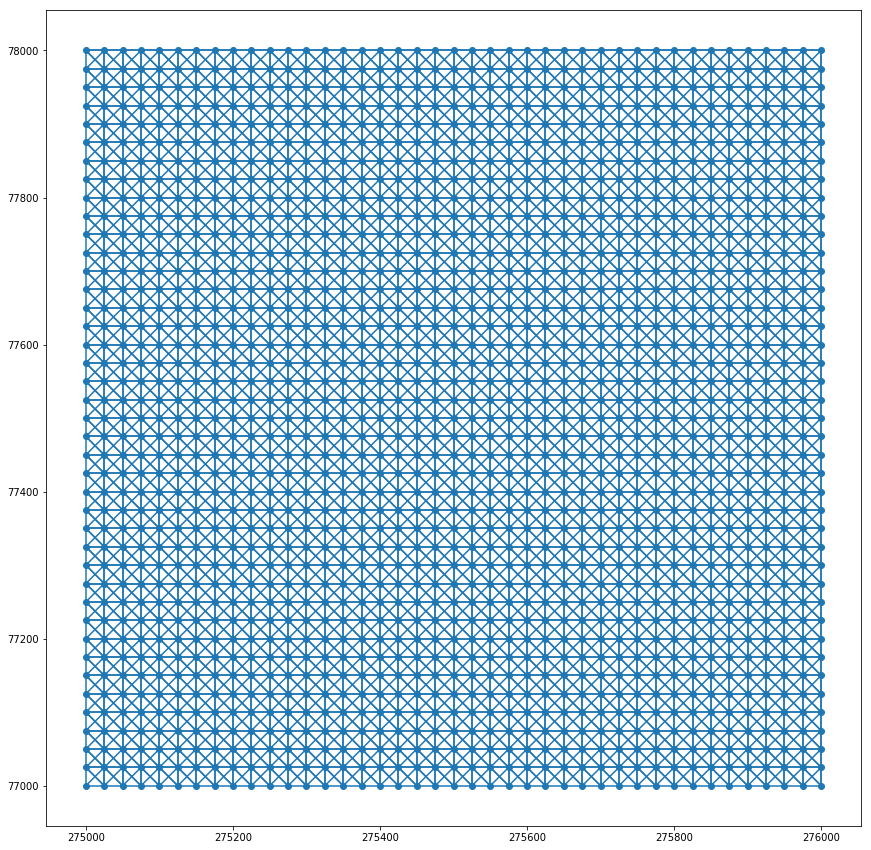

In [82]:
lines = []
start_node = []
end_node = []
for index,row in network_nodes.iterrows():
    buffer = row.geometry.buffer(37)
    intersection = network_nodes.intersection(buffer)
    intersection = intersection[~intersection.is_empty]
    for j in intersection[1:]:
        start_node.append(row.fid)
        end_point = network_nodes.loc[network_nodes['geometry']== j,'fid'].iloc[0]
        end_node.append(end_point)
        lines.append(LineString([row.geometry,j]))
    print('Finished row',row.fid)
links_gpd = gpd.GeoSeries(lines)

fig, ax = plt.subplots(figsize=(15,15))
links_gpd.plot(ax=ax,zorder=3)
nodes_gpd.plot(ax=ax,zorder = 2)
plt.savefig("grid.png",transparent=True)

In [83]:
links_fid = range(1,len(lines)+1)
network_links = gpd.GeoDataFrame({'fid':links_fid,'startNodes':start_node,'endNode':end_node,'geometry':lines})
#network_links = gpd.GeoDataFrame({'fid':links_fid,'startNodes':start_node,'geometry':lines})

network_links

,fid,startNodes,endNode,geometry
0,1,1,2,"LINESTRING (275000.000 77000.000, 275000.000 7..."
1,2,1,42,"LINESTRING (275000.000 77000.000, 275025.000 7..."
2,3,1,43,"LINESTRING (275000.000 77000.000, 275025.000 7..."
3,4,2,2,"LINESTRING (275000.000 77025.000, 275000.000 7..."
4,5,2,3,"LINESTRING (275000.000 77025.000, 275000.000 7..."
...,...,...,...,...
12955,12956,1680,1680,"LINESTRING (276000.000 77975.000, 276000.000 7..."
12956,12957,1680,1681,"LINESTRING (276000.000 77975.000, 276000.000 7..."
12957,12958,1681,1640,"LINESTRING (276000.000 78000.000, 275975.000 7..."
12958,12959,1681,1680,"LINESTRING (276000.000 78000.000, 276000.000 7..."


In [84]:
G = network_links['geometry'].apply(lambda geom: geom.wkb)
network_links=network_links.loc[G.drop_duplicates().index]

In [85]:
network_links.to_file("Study_area/network_links.geojson", driver='GeoJSON')
network_nodes.to_file("Study_area/network_nodes.geojson", driver='GeoJSON')

C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.


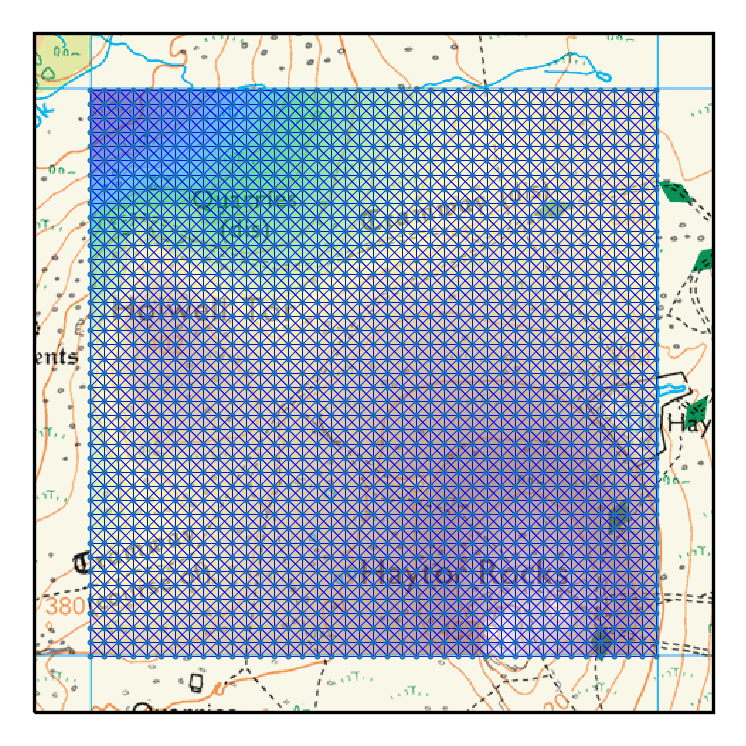

In [12]:
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=crs.OSGB())

# display background map
ax.imshow(background_image, origin='upper', extent=extent, zorder=0)

# display elevation
study_area = mapping(study_area_shapely)
elevation_mask, transform_index = mask.mask(elevation,[study_area], filled=False, crop=False)
rasterio.plot.show(elevation_mask, alpha=0.6, transform=transform_index, ax=ax, zorder=1,
                           cmap='terrain')

# displaying nodes
network_nodes.plot(ax=ax,zorder = 3,markersize=0.2)

#displaying links
network_links.plot(ax=ax,zorder = 2,edgecolor='blue', linewidth=0.2)

#set the extent to the study area
#study_area_gpd.plot(ax=ax,zorder = 2)
display_extent = ((study_area_shapely.bounds[0]- 100, study_area_shapely.bounds[2]+ 100,
                       study_area_shapely.bounds[1]- 100, study_area_shapely.bounds[3]+ 100))

ax.set_extent(display_extent, crs=crs.OSGB())
plt.show()

Creating the Network(Grouped)

In [86]:
graph = nx.Graph()
for index, row in network_links.iterrows():
    graph.add_edge(row['startNodes'], row['endNode'], fid=row['fid'])

path = nx.dijkstra_path(graph, source=1, target=1241, weight="weight")

geom = []
links = []
first_node = path[0]
for node in path[1:]:
    link_fid = graph.edges[first_node, node]['fid']
    links.append(link_fid)
    row = network_links.loc[network_links['fid'] == link_fid]
    geom.append(row['geometry'].cascaded_union)
    first_node = node

path_gpd = gpd.GeoDataFrame({'fid': links, 'geometry': geom})
path_gpd

,fid,geometry
0,2,"LINESTRING (275000.000 77000.000, 275025.000 7..."
1,205,"LINESTRING (275025.000 77000.000, 275050.000 7..."
2,527,"LINESTRING (275050.000 77000.000, 275075.000 7..."
3,849,"LINESTRING (275075.000 77000.000, 275100.000 7..."
4,1171,"LINESTRING (275100.000 77000.000, 275125.000 7..."
5,1493,"LINESTRING (275125.000 77000.000, 275150.000 7..."
6,1815,"LINESTRING (275150.000 77000.000, 275175.000 7..."
7,2137,"LINESTRING (275175.000 77000.000, 275200.000 7..."
8,2459,"LINESTRING (275200.000 77000.000, 275225.000 7..."
9,2781,"LINESTRING (275225.000 77000.000, 275250.000 7..."


C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:28: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.


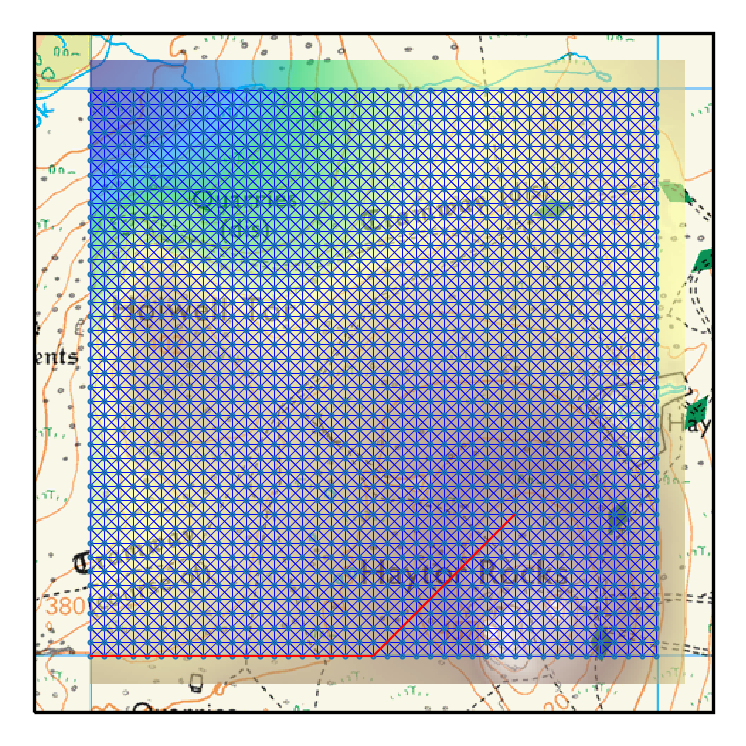

In [87]:
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=crs.OSGB())

# display background map
ax.imshow(background_image, origin='upper', extent=extent, zorder=0)

# display elevation
elevation_study_area = shapely.affinity.scale(study_area_shapely,xfact=1.1, yfact=1.1,origin='center')
study_area = mapping(elevation_study_area)
elevation_mask, transform_index = mask.mask(elevation,[study_area], filled=False, crop=False)
rasterio.plot.show(elevation_mask, alpha=0.6, transform=transform_index, ax=ax, zorder=1,
                           cmap='terrain')

# displaying nodes
network_nodes.plot(ax=ax,zorder = 3,markersize=0.2)

#displaying links
network_links.plot(ax=ax,zorder = 2,edgecolor='blue', linewidth=0.2)

# display path
path_gpd.plot(ax=ax,zorder = 4,edgecolor='red', linewidth=0.5)

#set the extent to the study area
#study_area_gpd.plot(ax=ax,zorder = 2)
display_extent = ((study_area_shapely.bounds[0]- 100, study_area_shapely.bounds[2]+ 100,
                       study_area_shapely.bounds[1]- 100, study_area_shapely.bounds[3]+ 100))

ax.set_extent(display_extent, crs=crs.OSGB())
plt.show()

Extracting Elevation to each point

In [91]:
height = []
for index,row in network_nodes.iterrows():
    point_index = rasterio.transform.rowcol(transform_index, row.geometry.x,
                                                    row.geometry.y)
    point_elevation = elevation_mask[0][point_index]
    height.append(point_elevation)
network_nodes['height'] = height
network_nodes

,geometry,fid,height
0,POINT (275000.000 77000.000),1,392.850006
1,POINT (275000.000 77025.000),2,388.700012
2,POINT (275000.000 77050.000),3,383.160004
3,POINT (275000.000 77075.000),4,380.390015
4,POINT (275000.000 77100.000),5,377.790009
...,...,...,...
1676,POINT (276000.000 77900.000),1677,379.709991
1677,POINT (276000.000 77925.000),1678,381.480011
1678,POINT (276000.000 77950.000),1679,385.239990
1679,POINT (276000.000 77975.000),1680,386.320007


Remove nodes and links which go through objects